In [8]:
import pandas as pd
from lib.pitch_control import plot_pitch_control, KNNPitchControl, SpearmanPitchControl, FernandezPitchControl
from lib.draw import pitch
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/all_goals.csv', low_memory=False)
df.edgecolor.fillna('white', inplace=True)
df.bgcolor.fillna('black', inplace=True)
df.sample(5)

,bgcolor,dx,dy,edgecolor,frame,play,player,player_num,team,x,y,z,coords,player_obj,num,name
3064,black,0.124285,0.166524,white,119,Bayern 0 - [1] Liverpool,0,NaN,NaN,86.192665,67.267954,0.0,NaN,NaN,NaN,NaN
69978,red,-0.267577,-0.193140,white,42,Liverpool [1] - 0 Watford,11031,NaN,attack,76.200929,35.616687,0.0,NaN,NaN,NaN,NaN
9342,red,-0.147412,-0.112219,white,22,Fulham 0 - [1] Liverpool,13011,NaN,attack,39.588853,85.452219,0.0,NaN,NaN,NaN,NaN
26356,yellow,-0.011550,0.121857,maroon,82,Liverpool [4] - 0 Barcelona,854,NaN,defense,91.115307,47.421073,0.0,NaN,NaN,NaN,NaN
54137,blue,-0.250063,-0.303614,white,74,Liverpool [1] - 0 Everton,1847,NaN,defense,44.512691,58.991223,0.0,NaN,NaN,NaN,NaN


In [10]:
game = df[df.play == 'Liverpool [2] - 0 Porto']
frame = game[game.frame == 120]

In [11]:
pc_model = KNNPitchControl()
control1 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[0], smoothing=5)
control2 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[0, 10, 20], smoothing=8)
control3 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[0, 10, 20], smoothing=6, distance_basis=250)
control4 = pc_model.predict(frame)
pc_model = SpearmanPitchControl()
control5 = pc_model.predict(frame)
pc_model = FernandezPitchControl()
control6 = pc_model.predict(frame, game)

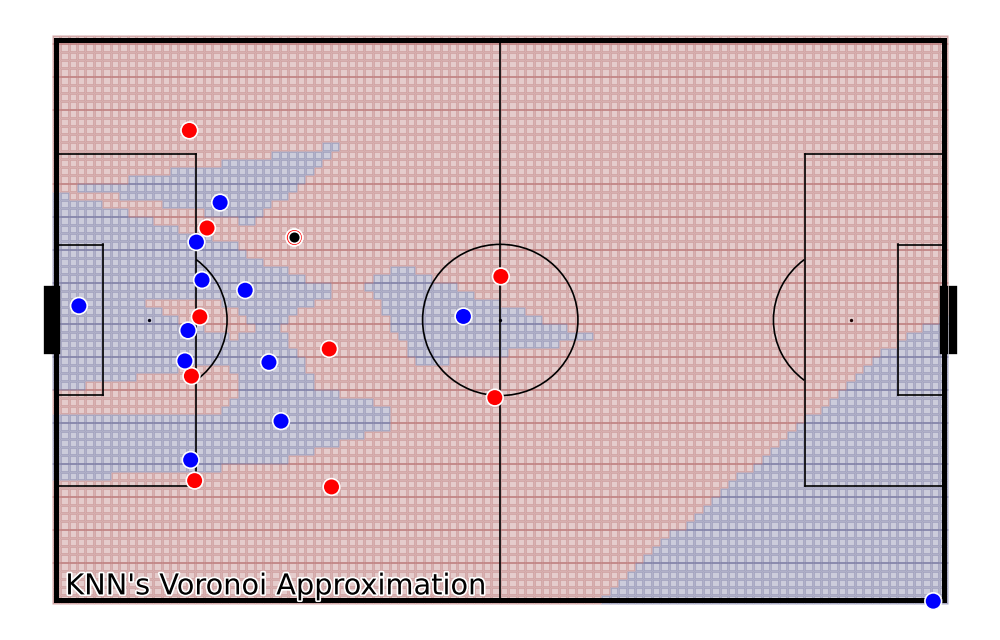

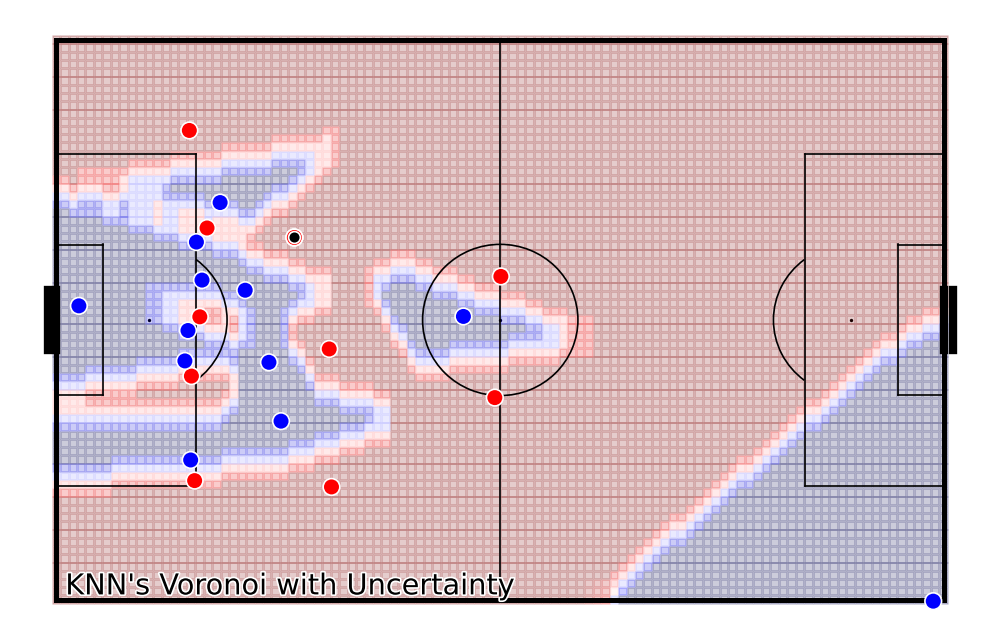

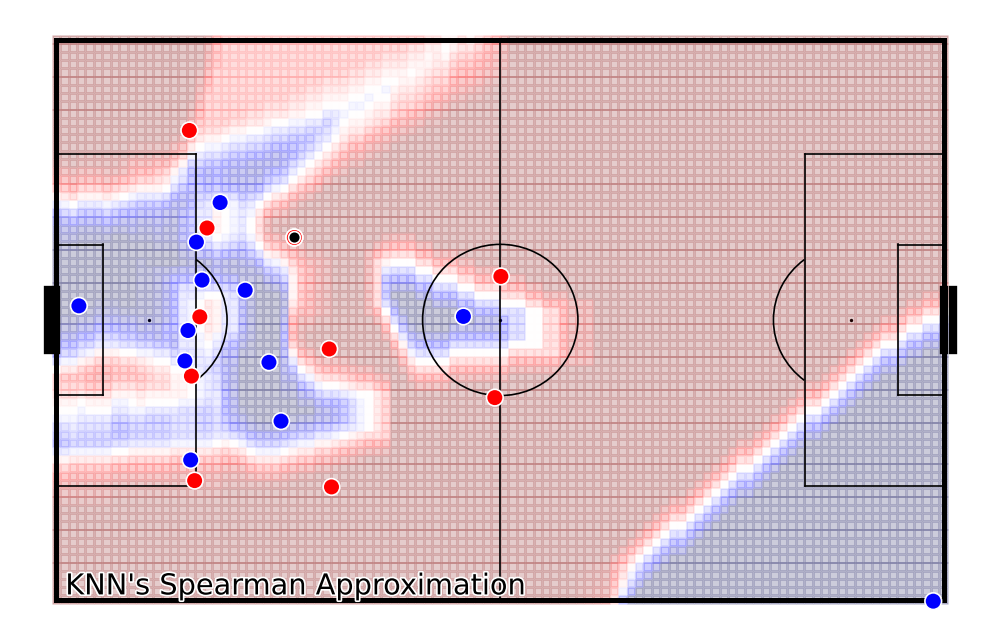

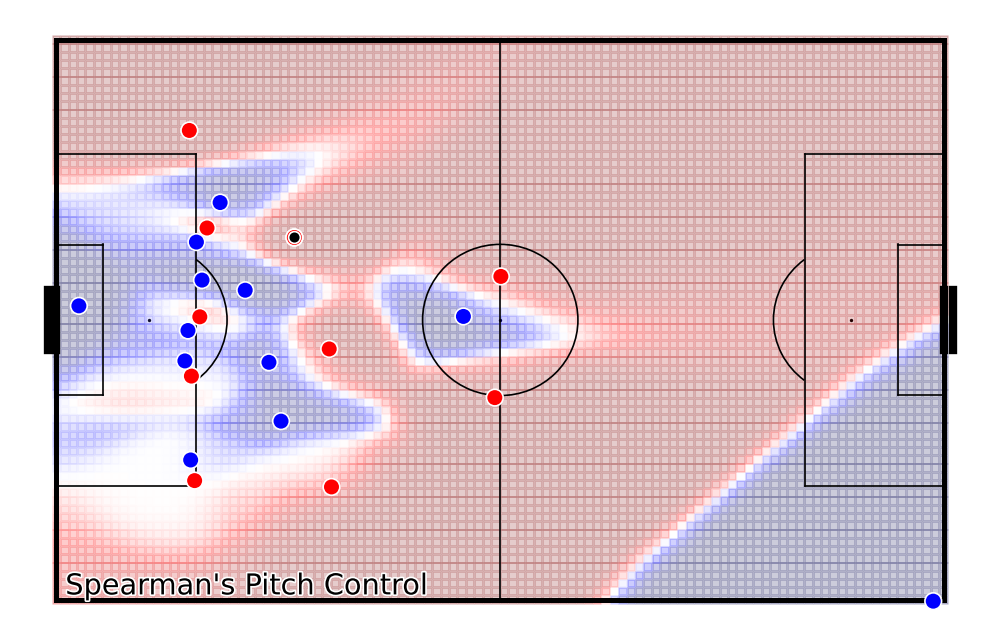

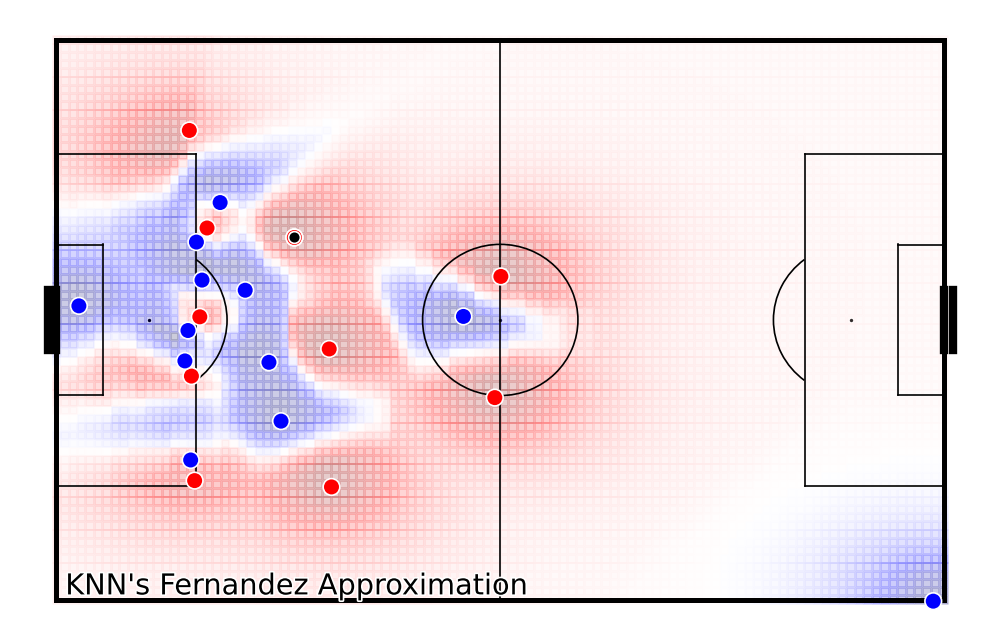

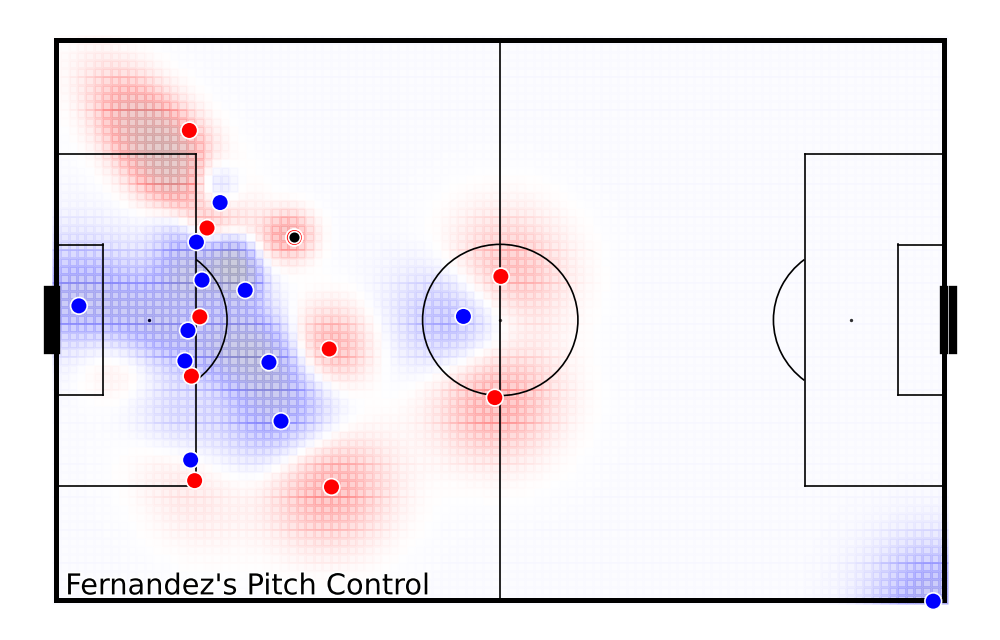

In [12]:
plot_pitch_control(frame, pc_model.grid, control1, modelname='KNN\'s Voronoi Approximation')
plot_pitch_control(frame, pc_model.grid, control2, modelname='KNN\'s Voronoi with Uncertainty')
plot_pitch_control(frame, pc_model.grid, control3, modelname='KNN\'s Spearman Approximation')
plot_pitch_control(frame, pc_model.grid, control5, modelname='Spearman\'s Pitch Control')
plot_pitch_control(frame, pc_model.grid, control4, modelname='KNN\'s Fernandez Approximation')
plot_pitch_control(frame, pc_model.grid, control6, modelname='Fernandez\'s Pitch Control')